# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [10]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [29]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

male_ht_mean = np.mean(male_df['Height'])
male_ht_sd = np.std(male_df['Height'])
male_wt_mean = np.mean(male_df['Weight'])
male_wt_sd = np.std(male_df['Weight'])
female_ht_mean = np.mean(female_df['Height'])
female_ht_sd = np.std(female_df['Height'])
female_wt_mean = np.mean(female_df['Weight'])
female_wt_sd = np.std(female_df['Weight'])

print(f'Male Height mean: {male_ht_mean}')
print(f'Male Height sd: {male_ht_sd}')
print(f'Male Weight mean: {male_wt_mean}')
print(f'Male Weight sd: {male_wt_sd}')
print(f'Female Height mean: {female_ht_mean}')
print(f'Female Height sd: {female_ht_sd}')
print(f'Female Weight mean: {female_wt_mean}')
print(f'Female Weight sd: {female_wt_sd}')

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863075878119538
Male Weight mean: 187.0206206581932
Male Weight sd: 19.779176302396458
Female Height mean: 63.70877360342507
Female Height sd: 2.696014373880709
Female Weight mean: 135.86009300746835
Female Weight sd: 19.020565463416645


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

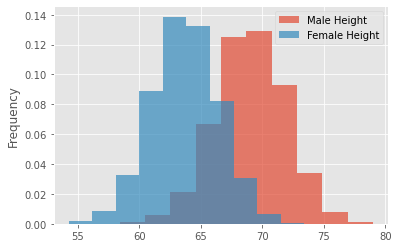

In [36]:
# Your code here
binsize=10
male_df.Height.plot.hist(
    bins=binsize, 
    density=True, 
    alpha = 0.7, 
    label="Male Height")
female_df.Height.plot.hist(
    bins=binsize, 
    density=True, 
    alpha = 0.7, 
    label="Female Height")
plt.legend()
plt.show();



In [18]:
# Record your observations - are these inline with your personal observations?
# Heights of both males and females tend to be normally distributed.  Males on average
# tend to be taller than females.  The chances of a female being taller than the average male
# is very slim and the chances of a male beting shorter than the average femaile is also 
#very slim.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

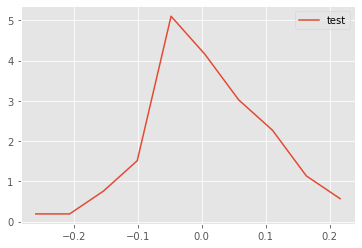

In [41]:
def density(x):
    n, bins = np.histogram(x, bins=binsize, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = .5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

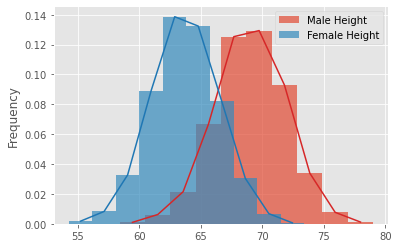

In [48]:
# Your code here 
male_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label='Male Height')
female_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label='Female Height')
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y,color="tab:red")
x,y = density(female_df.Height)
plt.plot(x,y, color="tab:blue")
plt.show()

## Repeat the above exercise for male and female weights

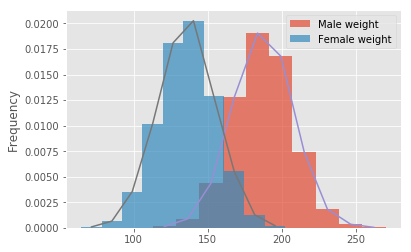

In [21]:
# Your code here 

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

/Users/josh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/josh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


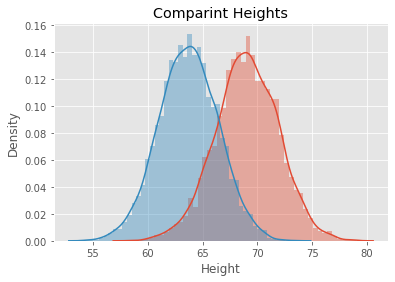

In [52]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparint Heights')
plt.legend
plt.show()

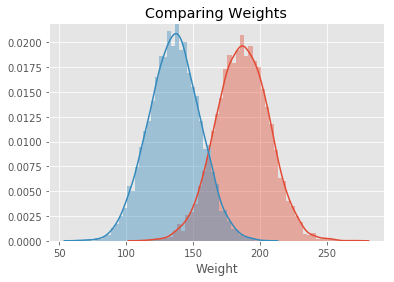

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.